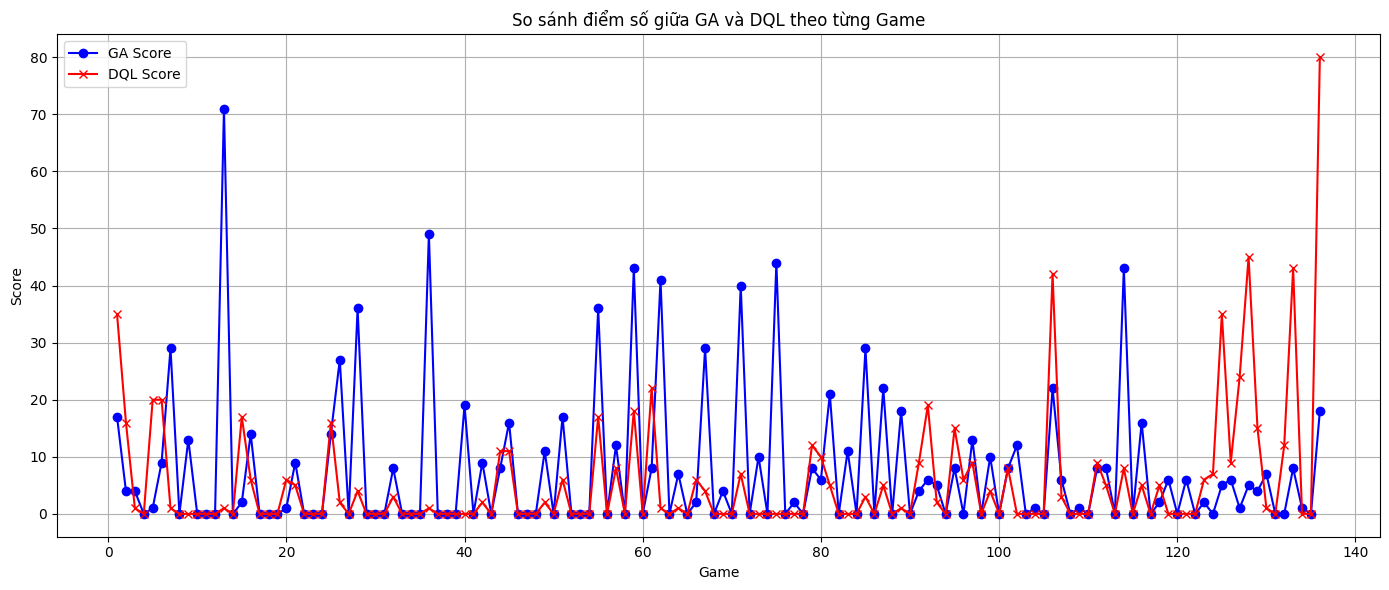

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Hàm đọc dữ liệu từ file CSV
def read_scores():
    try:
        df = pd.read_csv("scores_log.csv")  # Nếu dùng trong notebook có thể dùng đường dẫn tuyệt đối
        return df
    except:
        return pd.DataFrame(columns=["Game", "GA Score", "DQL Score"])

# Đọc dữ liệu
scores_df = read_scores()

# Vẽ biểu đồ so sánh điểm số
plt.figure(figsize=(14, 6))
plt.plot(scores_df['Game'], scores_df['GA Score'], label='GA Score', color='blue', marker='o')
plt.plot(scores_df['Game'], scores_df['DQL Score'], label='DQL Score', color='red', marker='x')
plt.title('So sánh điểm số giữa GA và DQL theo từng Game')
plt.xlabel('Game')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


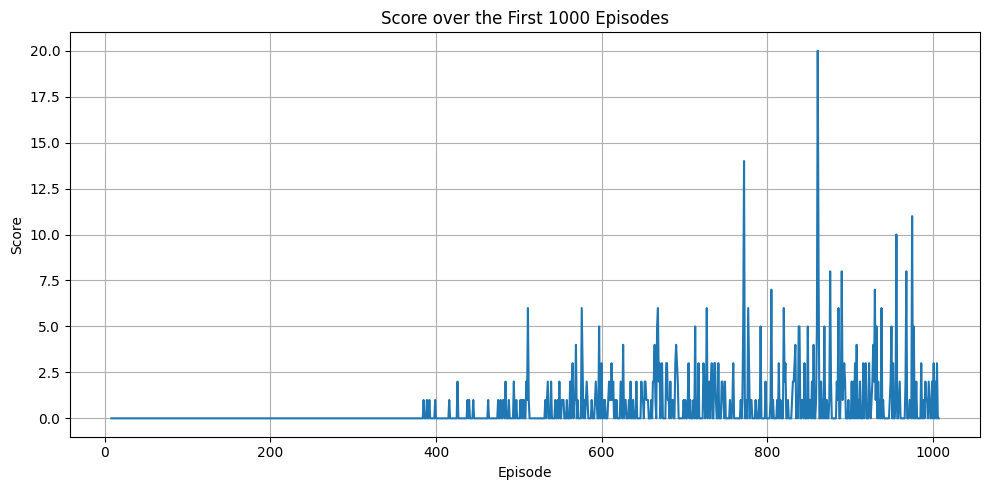

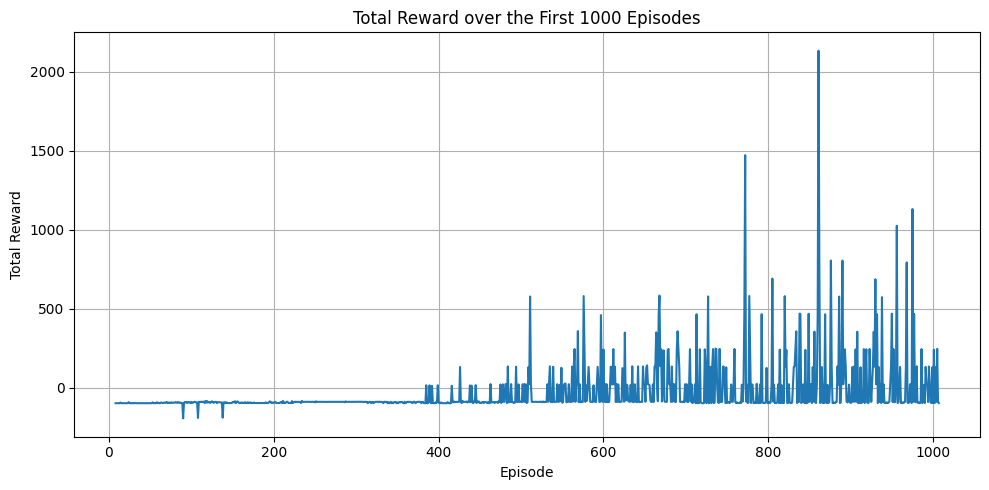

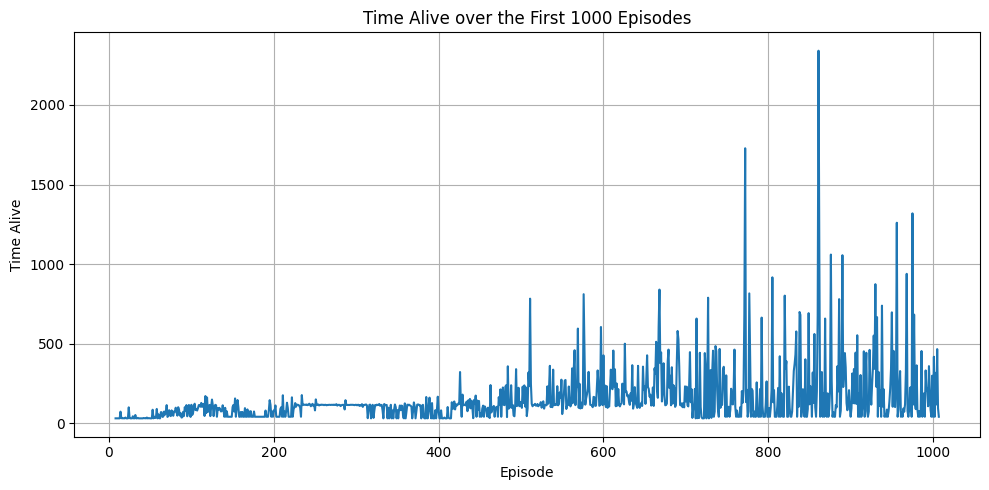

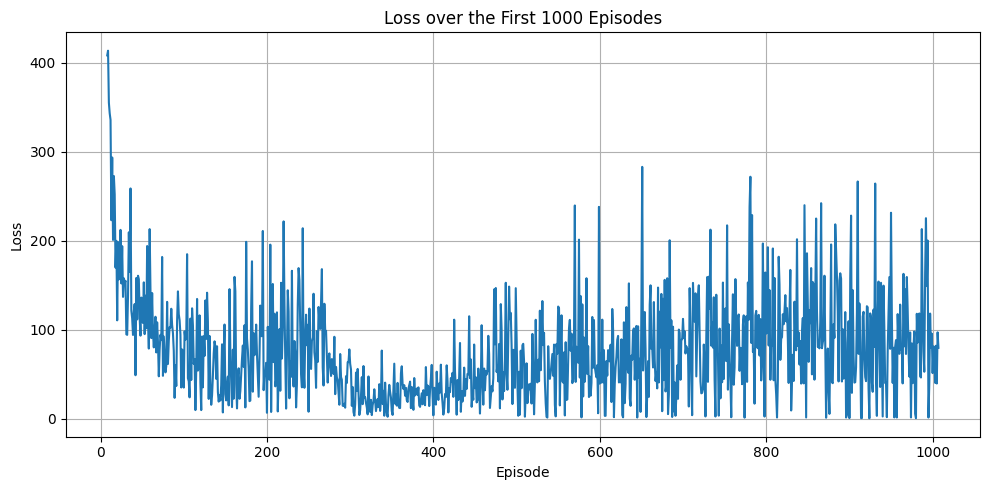

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Đường dẫn tới file CSV
file_path = 'data_train_dql - Sheet2.csv'  # nếu dùng Google Colab thì cần upload file hoặc chỉnh lại đường dẫn

# Đọc dữ liệu
df = pd.read_csv(file_path)

# Hàm trích xuất giá trị loss từ chuỗi tensor(...)
def extract_loss_value(loss_str):
    if pd.isna(loss_str):
        return None
    match = re.search(r"tensor\(([\d\.]+)", loss_str)
    return float(match.group(1)) if match else None

# Áp dụng hàm trích xuất vào cột 'loss'
df['Loss Value'] = df['loss'].apply(extract_loss_value)

# Loại bỏ dòng không có loss
df_cleaned = df.dropna(subset=['Loss Value'])

# Chỉ lấy 1000 episode đầu tiên
df_plot = df_cleaned.head(1000)

# Các cột cần vẽ (trừ loss vì đã xử lý riêng)
columns_to_plot = [
    ('Score', 'Score'),
    ('Total Reward', 'Total Reward'),
    ('Time Alive', 'Time Alive'),
    ('Loss Value', 'Loss'),
    # ('Epsilon', 'Epsilon'),
    # ('Replay Buffer Size', 'Replay Buffer Size'),
    # ('Train Steps', 'Train Steps')
]

# Vẽ từng biểu đồ
for col, label in columns_to_plot:
    plt.figure(figsize=(10, 5))
    plt.plot(df_plot['Episode'], df_plot[col])
    plt.xlabel('Episode')
    plt.ylabel(label)
    plt.title(f'{label} over the First 1000 Episodes')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


import pandas as pd

def read_scores():
	try:
		df = pd.read_csv("scores_log.csv")
		return df
	except:
		return pd.DataFrame(columns=["Game", "GA Score", "DQL Score"])
